All imports 


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv("diabetic_data.csv")
diabetes_data


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Get all the column names from the dataframe

In [3]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Seperate the target viariable from the dataset.


In [4]:
pd.isna(diabetes_data).sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
diabetes_data["A1Cresult"].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

Pandas is treating none as nan which i dont want to. The diabetic dataset does not contain any missing values but since none means "not measure" according to the Data description. 
Therefore, I am converting those nan values into "not measured" for every row with the code below

In [6]:
diabetes_data["A1Cresult"] =  diabetes_data['A1Cresult'].replace(np.nan, "not measured")

In [7]:
diabetes_data["A1Cresult"].isna().sum()

0

Similary, max_glu_serum does not have any missing values. Panda is treating "none" with "nan".
I am replacing the nan with "not measured",

In [8]:
diabetes_data["max_glu_serum"] =  diabetes_data['max_glu_serum'].replace(np.nan, "not measured")

In [9]:
diabetes_data["max_glu_serum"].isna().sum()

0

Now verifying Unique values for max_glu_serum nad A1Cresult

In [10]:
diabetes_data["max_glu_serum"].unique()

array(['not measured', '>300', 'Norm', '>200'], dtype=object)

In [11]:
diabetes_data["A1Cresult"].unique()

array(['not measured', '>7', '>8', 'Norm'], dtype=object)

In [12]:
diabetes_data["weight"].unique()


array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [13]:
# here we can see ? symbol. This is a missing value so I will replace it with np.na and count how many are missing in total
diabetes_data["weight"] = diabetes_data["weight"].replace("?", np.nan)


In [14]:
diabetes_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [15]:
# I will drop the weight column as 98569 values are missing which is 91% of the data.
diabetes_data.drop(columns=["weight"], inplace=True)

In [16]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
# similarly I am going to drop payer code, medical_speicality, encounter ID,
# patient number, payer code, medical speciality

diabetes_data.drop(columns=["encounter_id", "patient_nbr", "medical_specialty", "payer_code"], inplace=True)
diabetes_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Now is the time to do some data exploration. I will analyze the data one-by-one for all the features starting with race.

In [18]:
diabetes_data["race"].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [19]:
row_count = diabetes_data["race"].str.contains("?", na=False, regex=False).sum()
print(row_count)

2273


In [20]:
# Removing all rows that dont contains the "?" symbol.
diabetes_data = diabetes_data[~diabetes_data["race"].str.contains("\?", na=False)]
diabetes_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [21]:
diabetes_data["gender"].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [22]:
row_count = diabetes_data["gender"].str.contains("Unknown/Invalid").sum()
print(row_count)

1


In [23]:
#removing rows for columns "gender" where value is "Unknown/Invalid"
diabetes_data = diabetes_data[~diabetes_data["gender"].str.contains("Unknown/Invalid", na=False)]
diabetes_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [24]:
diabetes_data["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [25]:
diabetes_data["admission_type_id"].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [26]:
target_var = diabetes_data["readmitted"]
target_var
pd.unique(target_var)

array(['NO', '>30', '<30'], dtype=object)

In [27]:
diabetes_data["discharge_disposition_id"].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [28]:
diabetes_data["admission_source_id"].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [29]:
diabetes_data["time_in_hospital"].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10, 11,  6,  8, 14])

In [30]:
diabetes_data["num_lab_procedures"].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  19,  64,  25,  53,  52,  87,
        27,  37,  46,  28,  36,  48,  72,  10,   2,  65,  67,  40,  58,
        57,  32,  83,  34,  39,  69,  38,  56,  22,  96,  78,  61,  88,
        66,  43,  50,   1,  18,  82,  54,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,  95,  97,  84,  14,  74, 105,  86,  98,  20,
         5,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [31]:
diabetes_data["num_procedures"].unique()

array([0, 5, 1, 6, 2, 3, 4])

In [32]:
diabetes_data["num_medications"].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 48, 57, 53, 59, 56, 63, 58, 70, 67, 64, 60, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [33]:
diabetes_data["number_outpatient"].unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [34]:
diabetes_data["number_emergency"].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [35]:
diabetes_data["number_inpatient"].unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [36]:
diabetes_data["diag_1"].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', 'V57', '189',
       '786', '427', '996', '277', '584', '462', '473', '411', '174',
       '486', '998', '511', '432', '626', '295', '196', '250.6', '182',
       '845', '423', '808', '250.4', '722', '403', '250.11', '784', '707',
       '440', '151', '715', '997', '198', '564', '38', '590', '578',
       '250.32', '433', '569', '185', '536', '255', '250.13', '599',
       '558', '574', '491', '560', '244', '250.03', '577', '730', '188',
       '824', '250.8', '332', '562', '291', '296', '510', '401', '263',
       '438', '70', '250.02', '493', '642', '571', '738', '593', '618',
       '250.42', '807', '456', '446', '572', '575', '250.41', '820',
       '515', '780', '250.22', '995', '235', '250.82', '721', '787',
       '556', '162', '724', '282', '514', 'V55', '281', '250.33', '530',
       '466', '435', '250.12', 'V53', '789', '566', '822', '191', '557',
 

In [37]:
diabetes_data["diag_2"].unique()

array(['?', '250.01', '250', '250.43', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '401', '715', '496',
       '428', '585', '250.02', '410', '999', '996', '135', '244', '41',
       '571', '276', '997', '599', '424', '491', '553', '707', '286',
       '440', '493', '242', '70', 'V45', '250.03', '357', '511', '196',
       '396', '197', '414', '250.52', '577', '535', '413', '53', '780',
       '518', '566', '250.6', '867', '285', '486', 'V15', '8', '788',
       '340', '574', '581', '228', '530', '250.82', '786', '294', '567',
       '785', '512', '305', '250.51', '280', '648', '560', '444', '38',
       'V10', '578', '277', '781', '250.42', '278', '426', '584', '462',
       '402', '153', '272', '733', '34', '881', '203', '250.41', '250.13',
       '729', '293', '245', '250.12', '558', '787', '342', '573', '626',
       '303', '250.53', '458', '710', '415', 'V42', '284', '569', '759',
       '682', '112', '292', '435', '290', '250.93', '642', '5

In [38]:
diabetes_data["diag_3"].unique()

array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '582', 'V43', '250.01', '263',
       '250.42', '276', '482', '401', '250.41', '585', '781', '278',
       '998', '428', '568', '682', '250.02', '305', '707', '496', '599',
       '424', '518', '553', '794', '411', 'V42', '531', '511', '490',
       '562', '250.8', '250.7', '250.52', '784', '491', '581', '420',
       '724', '730', '789', '131', '250.82', '999', '41', '493', '250.03',
       '753', '786', '529', 'E888', '425', '595', '303', '560', '711',
       '8', '492', '332', '296', '438', '362', '250.4', '654', '244',
       'V70', '737', '625', '681', '250.51', '404', 'V10', '810', '280',
       '440', '785', '569', '272', '997', '250.43', '918', '584', '54',
       '788', '426', '722', '250.92', '196', '461', '535', '787', '891',
       '284', '458', '648', '780', '182', '285', '593', '413', '664',
       '564', '201', '356', 'V15', '292', '782', '715', '473', '4

In [39]:
diabetes_data["number_diagnoses"].unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [40]:
diabetes_data["max_glu_serum"].unique()

array(['not measured', '>300', 'Norm', '>200'], dtype=object)

In [41]:
diabetes_data["A1Cresult"].unique()

array(['not measured', '>7', '>8', 'Norm'], dtype=object)

In [42]:
diabetes_data["metformin"].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [43]:
diabetes_data["change"].unique()

array(['No', 'Ch'], dtype=object)

In [44]:
diabetes_data["diabetesMed"].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
diabetes_data["readmitted"].unique()

array(['NO', '>30', '<30'], dtype=object)

No that we have removed all null/redundant values, we will start doing some real exploratory data analysis

In [46]:
diabetes_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

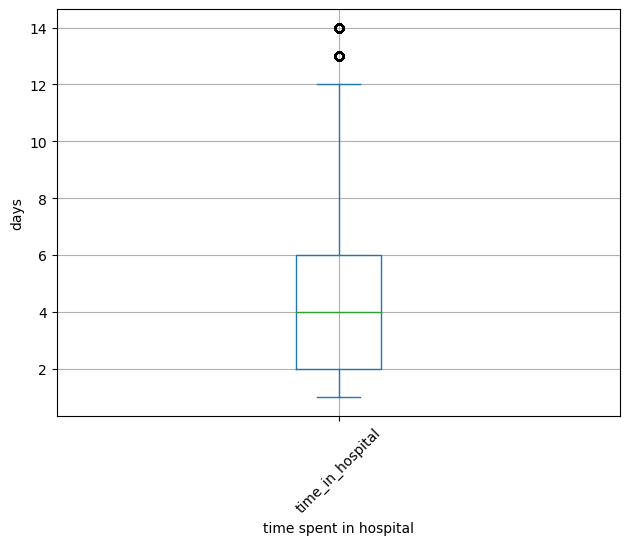

In [47]:
box_plot_time_hospital = diabetes_data["time_in_hospital"].plot(kind="box", grid=True)
box_plot_time_hospital.set_xlabel("time spent in hospital")
box_plot_time_hospital.set_ylabel("days")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [49]:
diabetes_data["time_in_hospital"].value_counts()

time_in_hospital
3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: count, dtype: int64

In [50]:
diabetes_data[["time_in_hospital", "num_lab_procedures", "num_medications", "number_emergency", "number_diagnoses",
             "number_outpatient", "number_inpatient"]].describe()

,time_in_hospital,num_lab_procedures,num_medications,number_emergency,number_diagnoses,number_outpatient,number_inpatient
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,4.398454,43.072971,16.026545,0.201343,7.439251,0.373357,0.643107
std,2.986972,19.695587,8.119809,0.939981,1.926043,1.276805,1.271370
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,31.000000,10.000000,0.000000,6.000000,0.000000,0.000000
50%,4.000000,44.000000,15.000000,0.000000,8.000000,0.000000,0.000000
75%,6.000000,57.000000,20.000000,0.000000,9.000000,0.000000,1.000000
max,14.000000,132.000000,81.000000,76.000000,16.000000,42.000000,21.000000


Box plot on num_lab_procedures


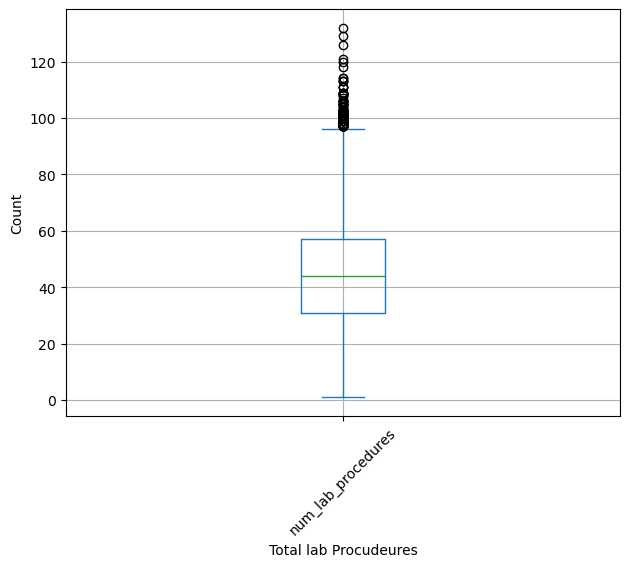

In [51]:
box_plot_time_hospital = diabetes_data["num_lab_procedures"].plot(kind="box", grid=True)
box_plot_time_hospital.set_xlabel("Total lab Procudeures")
box_plot_time_hospital.set_ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [52]:
diabetes_data[diabetes_data["num_lab_procedures"]>50][[ "time_in_hospital"]].value_counts().sort_index()
pd.set_option('display.max_rows', None)
diabetes_data[["num_lab_procedures", "time_in_hospital"]].groupby(["time_in_hospital", "num_lab_procedures"]).value_counts()

time_in_hospital  num_lab_procedures
1                 1                     700
                  2                     263
                  3                     227
                  4                     140
                  5                      81
                  6                     100
                  7                      73
                  8                     109
                  9                     213
                  10                    252
                  11                    188
                  12                    153
                  13                     93
                  14                     76
                  15                     95
                  16                    113
                  17                    161
                  18                    162
                  19                    291
                  20                    169
                  21                    154
                  22                   

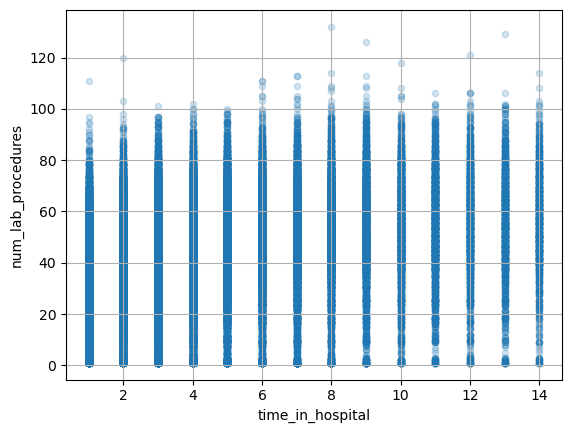

In [53]:
scatter_lab_stay = diabetes_data.plot(kind="scatter", x = "time_in_hospital",y = "num_lab_procedures", grid=True, alpha=0.2)
plt.show()

Looking at the scratter plot between time in hospital and the total lab procedures it appears that lab procedure tend to increase
as time in hospital increases. It also shows that for a particular time of stay, there are variation in the 
number of lab procedures as well. I have decided to keep the data as it is as removing any outliers may discard
valuable insights.

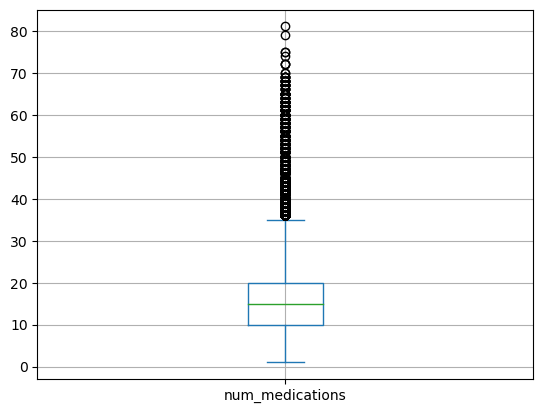

In [56]:
medication_total = diabetes_data['num_medications']
medication_total.plot(kind="box", grid=True)
plt.show()

In [59]:
medication_total.value_counts().sort_index()

num_medications
1      251
2      458
3      877
4     1376
5     1964
6     2632
7     3401
8     4266
9     4802
10    5244
11    5664
12    5866
13    5929
14    5579
15    5662
16    5305
17    4819
18    4421
19    3965
20    3608
21    3163
22    2812
23    2384
24    2074
25    1857
26    1576
27    1414
28    1212
29     971
30     832
31     697
32     608
33     495
34     443
35     383
36     281
37     285
38     221
39     205
40     174
41     138
42     124
43     126
44      98
45      80
46      89
47      72
48      57
49      61
50      52
51      43
52      53
53      37
54      33
55      31
56      37
57      26
58      24
59      20
60      20
61      14
62      15
63      13
64       7
65      12
66       5
67       7
68       7
69       5
70       2
72       3
74       1
75       2
79       1
81       1
Name: count, dtype: int64

I have decided to keep the outliers in the total medication because if I remove  cenrtain people who take more 
number of medicine could indicate multiple conditions of the patient. Removing them might influence the readmission 
prediction. I have decided to keep them.


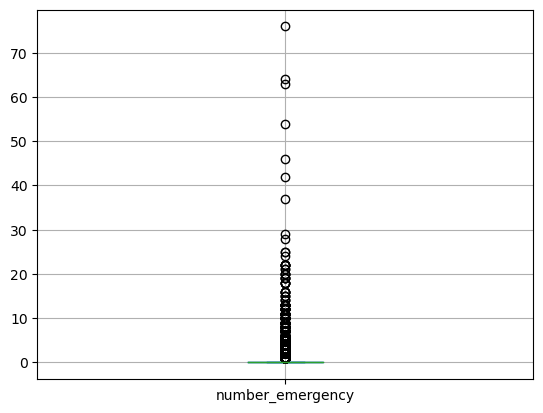

In [63]:
total_emergency_data = diabetes_data['number_emergency']
total_emergency_data.plot(kind="box", grid=True)
plt.show()

In [64]:
total_emergency_data.value_counts().sort_index()

number_emergency
0     88189
1      7615
2      2027
3       722
4       374
5       192
6        94
7        73
8        50
9        33
10       34
11       23
12       10
13       12
14        3
15        3
16        5
18        5
19        4
20        4
21        2
22        6
24        1
25        2
28        1
29        1
37        1
42        1
46        1
54        1
63        1
64        1
76        1
Name: count, dtype: int64

Again this is a valid data and I am not removing any outliers. max emergency total is 76 and min is 0. which is 
completely valid. Removing them might remove those people who are in high chance of going to be readmitted.

I want to know the relation between total emergency visits and number of diagnosis.


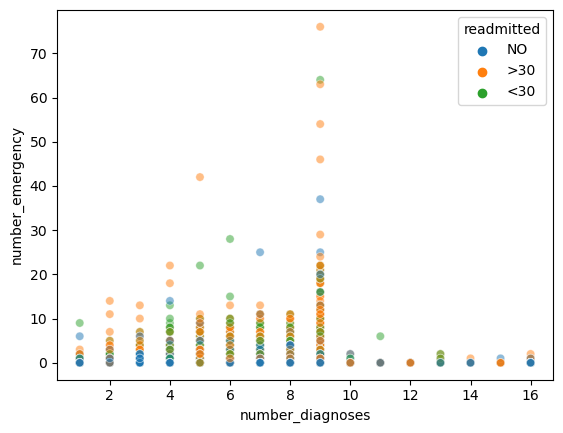

In [73]:
sns.scatterplot(data=diabetes_data, 
                x="number_diagnoses", 
                y="number_emergency", 
                hue="readmitted",  
                alpha=0.5)
plt.show()

Looking at the scatter plot, number of emergency visit increases as the total diagnosis increase up to 9.
Then starting from 10, it hits a plateau.
This could be of a number of factors like the patient being transferred into another department or
data collection limits.
Another key insight is that majority of the patients with diagnosis more than 9 are readmitted to the hospital.
Readmission also increases as the number of emergency visit increases.( patient who visit the emergency more often might have poorly controlled condition or acute conditions.



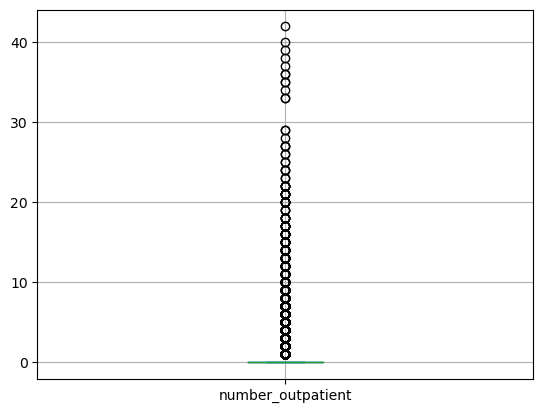

In [79]:
total_outpatient_visits = diabetes_data['number_outpatient'].plot(kind="box", grid=True)
plt.show()

The box plot suggest that majority of the  patient have 0 outpatient visit. Rest of the points in the graph
suggest that they are outliers but removing these might interfere without prediction of the true readmissionr rate
as visiting outpatient as much as 40 doest not seem to be abnormal for patients with complication. So I have 
decided to keep the data as is.

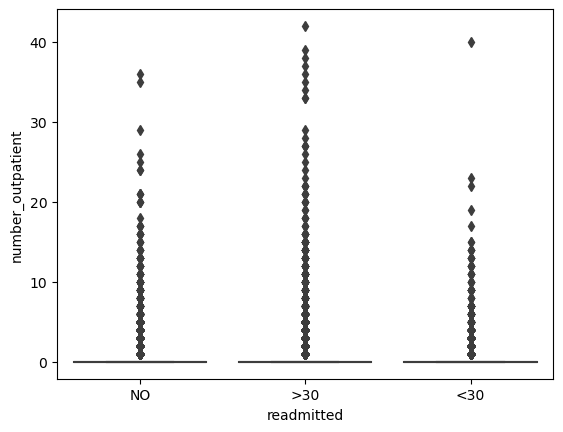

In [82]:
sns.boxplot(x="readmitted", y="number_outpatient", data=diabetes_data)
plt.show()

Inpatient Total Visits

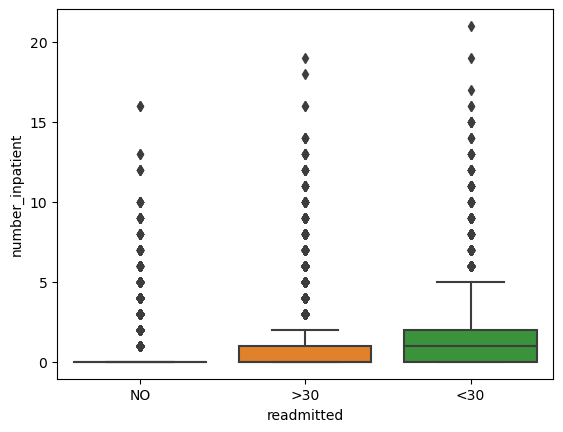

In [83]:
sns.boxplot(x="readmitted", y="number_inpatient", data=diabetes_data)
plt.show()

The plot above suggests that higher inpatient visit counts are associated with a higher chance of being readmitted within 30 days.

# Now lets take a look at our categorical features


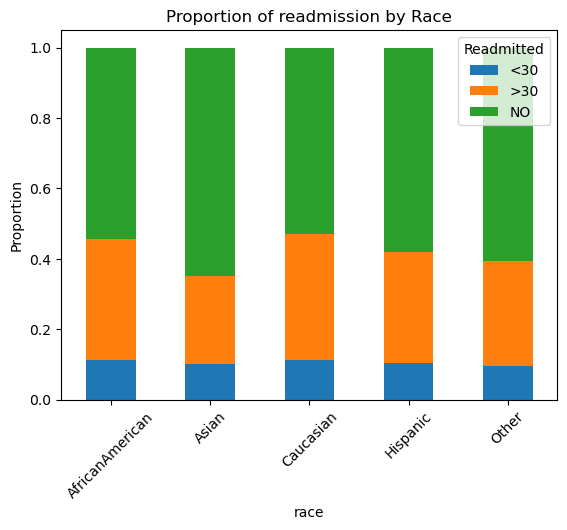

In [110]:
def stacked_bar(feature, title):
    
    crosstab = pd.crosstab(diabetes_data[feature], diabetes_data['readmitted'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted')
    plt.show()
stacked_bar("race", "Proportion of readmission by Race")

Looking at the stacked bar chart the readmittance rate is similar in all races.
But, I want to make sure by using the chisquare test.

In [105]:

from scipy.stats import chi2_contingency

def chisquare_test(feature):

    contingency_table = pd.crosstab(diabetes_data[feature], diabetes_data['readmitted'])

    chi2, p, degree_of_freedom, expected = chi2_contingency(contingency_table)

    print(f"Chi-square Statistic:{chi2}" )
    print(f"Degrees of Freedom:{degree_of_freedom}" )
    print(f"p-value:{p}")

chisquare_test("race")

Chi-square Statistic:94.14242894464596
Degrees of Freedom:8
p-value:6.688158971349481e-17


The p value appears to be extremely small which suggests that even though the stacked bar chart does not show
significant relation between race and readmittance within 30 days, The chi square test says it other wise.
I am definetly using race as one of my features in the prediction.


Now lets check for gender

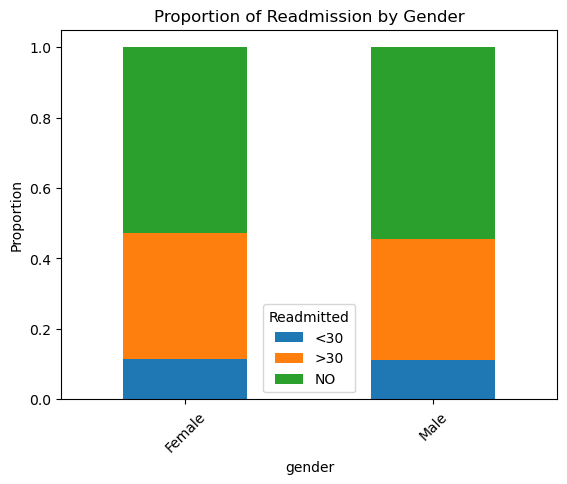

In [106]:


    
stacked_bar("gender", "Proportion of Readmission by Gender")

Again, looking at the graph, there are similar readmittance proportion between gender and readmittance. 
I want to check using the chi-square method



In [107]:
chisquare_test("gender")

Chi-square Statistic:35.233435270253
Degrees of Freedom:2
p-value:2.234378489930308e-08


Again the p-value is significantly low that rejects the null hypothesis of no assosiation between gender and readmisssion


In [111]:
chisquare_test("age")

Chi-square Statistic:300.17730566423313
Degrees of Freedom:18
p-value:4.427999247625145e-53


With 18 degree of freedom and chi-square of 300 with a very small p value, age is a strong candidate for
the prediction of readdmitance.